In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn import model_selection
import pandas as pd
from classify import classify
import preprocessing as prep
import matplotlib.pyplot as plt

## Load data

In [19]:
data = pd.read_csv('Data\\train.csv', index_col='PassengerId') # Load in the csv file
y = data['Survived']
print(y.head())
data = data.drop('Survived', axis=1)
print(data.head())

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64
             Pclass                                               Name  \
PassengerId                                                              
1                 3                            Braund, Mr. Owen Harris   
2                 1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                 3                             Heikkinen, Miss. Laina   
4                 1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                 3                           Allen, Mr. William Henry   

                Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
PassengerId                                                                
1              male  22.0      1      0         A/5 21171   7.2500   NaN   
2            female  38.0      1      0          PC 17599  71.2833   C85   
3            female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
4            female  35.0

In [4]:
X = data.values
print(X[:10])

[[3 'Braund, Mr. Owen Harris' 'male' 22.0 1 0 'A/5 21171' 7.25 nan 'S']
 [1 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)' 'female' 38.0 1
  0 'PC 17599' 71.2833 'C85' 'C']
 [3 'Heikkinen, Miss. Laina' 'female' 26.0 0 0 'STON/O2. 3101282' 7.925
  nan 'S']
 [1 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'female' 35.0 1 0
  '113803' 53.1 'C123' 'S']
 [3 'Allen, Mr. William Henry' 'male' 35.0 0 0 '373450' 8.05 nan 'S']
 [3 'Moran, Mr. James' 'male' nan 0 0 '330877' 8.4583 nan 'Q']
 [1 'McCarthy, Mr. Timothy J' 'male' 54.0 0 0 '17463' 51.8625 'E46' 'S']
 [3 'Palsson, Master. Gosta Leonard' 'male' 2.0 3 1 '349909' 21.075 nan
  'S']
 [3 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' 'female' 27.0 0 2
  '347742' 11.1333 nan 'S']
 [2 'Nasser, Mrs. Nicholas (Adele Achem)' 'female' 14.0 1 0 '237736'
  30.0708 nan 'C']]


In [5]:
y = y.values
# Initialize cross validation
kf = model_selection.KFold(n_splits=10)

## Basic classifier

In [6]:
totalInstances = 0 # Variable that will store the total intances that will be tested  
totalCorrect = 0 # Variable that will store the correctly predicted intances  
for trainIndex, testIndex in kf.split(X):
    trainSet = X[trainIndex]
    testSet = X[testIndex]
    trainLabels = y[trainIndex]
    testLabels = y[testIndex]
	
    predictedLabels = classify(trainSet, trainLabels, testSet)

    correct = 0	
    for i in range(testSet.shape[0]):
        if predictedLabels[i] == testLabels[i]:
            correct += 1
        
    print ('Accuracy: ' + str(float(correct)/(testLabels.size)))
    totalCorrect += correct
    totalInstances += testLabels.size
print ('Total Accuracy: ' + str(totalCorrect/float(totalInstances)))

Accuracy: 0.8111111111111111
Accuracy: 0.8202247191011236
Accuracy: 0.7528089887640449
Accuracy: 0.8426966292134831
Accuracy: 0.7640449438202247
Accuracy: 0.797752808988764
Accuracy: 0.7415730337078652
Accuracy: 0.7303370786516854
Accuracy: 0.8426966292134831
Accuracy: 0.7640449438202247
Total Accuracy: 0.7867564534231201


## Preprocessing

In [7]:
X = prep.preprocess(data)

             Pclass Name  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                         
1                 3    0    0  22.0      1      0   7.2500         2
2                 1    1    1  38.0      1      0  71.2833         0
3                 3    2    1  26.0      0      0   7.9250         2
4                 1    1    1  35.0      1      0  53.1000         2
5                 3    0    0  35.0      0      0   8.0500         2


C:\Users\TEMP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## PCA

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85, svd_solver="full")
pca.fit_transform(X)

array([[-1.39419806,  0.18932276,  0.29859087, -0.01787278,  0.52520433,
        -0.33881599],
       [ 2.42658996, -0.23050724, -1.37524371,  0.18689287, -0.14489675,
         0.4338106 ],
       [-0.78587658,  0.17529447, -0.43906837,  0.32566835, -1.51545945,
        -0.29298414],
       ...,
       [-0.05663698,  1.98015597,  0.40694696,  0.13220145, -1.27623778,
         0.89340778],
       [ 1.06200971, -1.04488227, -1.34244182,  0.16037292,  1.22227891,
        -0.13932455],
       [-0.88225871, -0.74510618, -0.61858653,  0.18218806,  0.57436746,
         0.52984824]])

## Decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

def decisionTree(D):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = DecisionTreeClassifier(max_depth=D)
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    print ('Total Accuracy: ' + str(accuracy))
    return accuracy

## Testing Decision Tree for different depths (best result with D=5 or 6)

2
Total Accuracy: 0.7890011223344556
3
Total Accuracy: 0.8271604938271605
4
Total Accuracy: 0.835016835016835
5
Total Accuracy: 0.819304152637486
6
Total Accuracy: 0.8305274971941639
7
Total Accuracy: 0.8170594837261503
8
Total Accuracy: 0.8215488215488216
9
Total Accuracy: 0.7957351290684624
10
Total Accuracy: 0.8024691358024691
11
Total Accuracy: 0.7867564534231201
12
Total Accuracy: 0.7867564534231201
13
Total Accuracy: 0.7867564534231201
14
Total Accuracy: 0.77665544332211


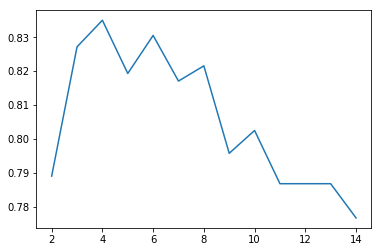

In [10]:
Ds = range(2,15)
accuracys = []
for D in Ds:
    print(D)
    accuracys.append(decisionTree(D))

plt.plot(Ds, accuracys, label = "accuracy % D")
plt.show()

## AdaBoost with decision trees

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def adaBoost(D):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=D))
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    print ('Total Accuracy: ' + str(accuracy))
    return accuracy

## Adaboost Test for Different values of D (best with D=7) 

2
Total Accuracy: 0.7890011223344556
3
Total Accuracy: 0.7833894500561167
4
Total Accuracy: 0.7755331088664422
5
Total Accuracy: 0.7867564534231201
6
Total Accuracy: 0.7878787878787878
7
Total Accuracy: 0.7878787878787878
8
Total Accuracy: 0.7946127946127947
9
Total Accuracy: 0.7968574635241302
10
Total Accuracy: 0.797979797979798
11
Total Accuracy: 0.7946127946127947
12
Total Accuracy: 0.792368125701459
13
Total Accuracy: 0.792368125701459
14
Total Accuracy: 0.7968574635241302


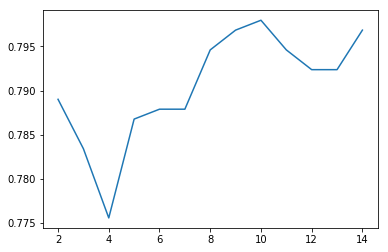

In [12]:
Ds = range(2,15)
accuracys = []
for D in Ds:
    print(D)
    accuracys.append(adaBoost(D))

plt.plot(Ds, accuracys, label = "accuracy % D")
plt.show()

## Neural Network

In [13]:
from sklearn.neural_network import MLPClassifier

def NN(hl_sizes=(100,), activation='relu', solver='sgd', lr=0.01, lr_evol='constant', max_iter=200, tol=0.001, early_stopping=True, validation_fraction=0.1, n_iter_no_change=5):
    totalInstances = 0 # Variable that will store the total intances that will be tested  
    totalCorrect = 0 # Variable that will store the correctly predicted intances  
    clf = MLPClassifier(hidden_layer_sizes=hl_sizes, activation=activation, solver=solver , learning_rate_init=lr, learning_rate=lr_evol, max_iter=max_iter, tol= tol, early_stopping=early_stopping, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change)
    for trainIndex, testIndex in kf.split(X):
        trainSet = X[trainIndex]
        testSet = X[testIndex]
        trainLabels = y[trainIndex]
        testLabels = y[testIndex]
        
        clf.fit(trainSet, trainLabels)
        predictedLabels = clf.predict(testSet)

        correct = 0	
        for i in range(testSet.shape[0]):
            if predictedLabels[i] == testLabels[i]:
                correct += 1
            
        totalCorrect += correct
        totalInstances += testLabels.size
        accuracy = totalCorrect/float(totalInstances)
    return accuracy

## NN Test with sgd, different constant lr, 1 hidden layer of varying size 

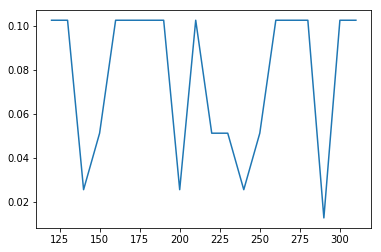

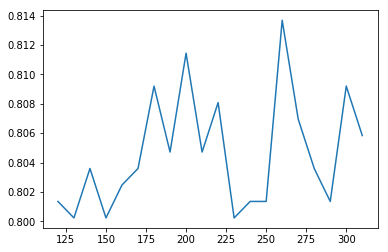

In [14]:
lrs = [(2**n)*0.0001 for n in range(11)]
sizes = [(120+10*n,) for n in range(20)]
accuracies=np.zeros((len(lrs), len(sizes)))

for i in range(len(lrs)):
    for j in range(len(sizes)):
        accuracies[i,j]=NN(hl_sizes=sizes[j], lr=lrs[i])

idx = np.argsort(accuracies, axis=0)
plt.figure(1)
plt.plot(sizes, [lrs[i] for i in idx[-1,:]], label="best learning rate for each hidden layer size")
plt.figure(2)
plt.plot(sizes, [accuracies[idx[-1,i],i] for i in range(len(sizes))], label="corresponding accuracies")
plt.show()


## NN Test for higher hidden layers sizes (from 200 to 400)

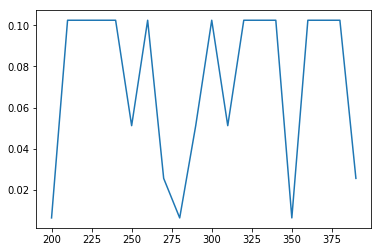

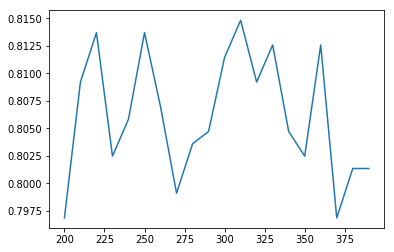

In [15]:
lrs = [(2**n)*0.0001 for n in range(11)]
sizes = [(200+10*n,) for n in range(20)]
accuracies=np.zeros((len(lrs), len(sizes)))

for i in range(len(lrs)):
    for j in range(len(sizes)):
        accuracies[i,j]=NN(hl_sizes=sizes[j], lr=lrs[i])

idx = np.argsort(accuracies, axis=0)
plt.figure(1)
plt.plot(sizes, [lrs[i] for i in idx[-1,:]], label="best learning rate for each hidden layer size")
plt.figure(2)
plt.plot(sizes, [accuracies[idx[-1,i],i] for i in range(len(sizes))], label="corresponding accuracies")
plt.show()

## LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

totalInstances = 0 # Variable that will store the total intances that will be tested  
totalCorrect = 0 # Variable that will store the correctly predicted intances  
clf = LDA(solver='eigen')
for trainIndex, testIndex in kf.split(X):
    trainSet = X[trainIndex]
    testSet = X[testIndex]
    trainLabels = y[trainIndex]
    testLabels = y[testIndex]

    clf.fit(trainSet, trainLabels)
    clf.transform(testSet)
    predictedLabels = clf.predict(testSet)

    correct = 0	
    for i in range(testSet.shape[0]):
        if predictedLabels[i] == testLabels[i]:
            correct += 1

    totalCorrect += correct
    totalInstances += testLabels.size
    accuracy = totalCorrect/float(totalInstances)
print("Total accuracy : ",str(accuracy))


Total accuracy :  0.792368125701459


In [18]:
import pandas as pd

test = pd.read_csv('Data\\test.csv')
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
